<a href="https://colab.research.google.com/github/saksham1211/Marketingai_Internship/blob/master/FINAL_NOTEBOOK_v2%5BOD%5D%5BNER%5D%5BLSTM%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL NOTEBOOK 2**

This notebook is a collection of three different components which are aimed to predict the category of a 401(K) investment company, based on the form given as the input.

**Input:-** Form of the investment company (*PDF FORMAT*)

**Output:-** *Category* ['Charles Schwab', 'Merrill Lynch', 'American Trade'..........]

## **<------------------Upload PDF------------------>**

### **MOUNT G-DRIVE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### **IMPORT LIBRARIES**

In [11]:
# The google-cloud-vision package already installed in colab, no need to install.
!pip install --upgrade google-cloud-vision

     |████████████████████████████████| 440kB 3.4MB/s 


In [1]:
pip install pdf2jpg

### **UPLOAD DOCUMENT HERE**

In [3]:
from io import StringIO
from google.colab import files
uploaded = files.upload()

Saving Bobby_J_Cole_.pdf to Bobby_J_Cole_.pdf


In [0]:
PDF_PATH = '/content/Bobby_J_Cole_.pdf'

**CONVERT PDF TO JPG**

In [0]:
from pdf2jpg import pdf2jpg
inputpath = PDF_PATH
outputpath = "/content"
# To convert single page
result = pdf2jpg.convert_pdf2jpg(inputpath, outputpath, pages="0, 1")

**IMAGE PATH**

In [0]:
IMAGE_PATH = '/content/Bobby_J_Cole_.pdf_dir/0_Bobby_J_Cole_.pdf.jpg'

In [0]:
IMAGE_PATH_SECOND_PAGE = "/content/Bobby_J_Cole_.pdf_dir/1_Bobby_J_Cole_.pdf.jpg"

Populating the interactive namespace from numpy and matplotlib


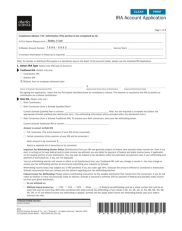


SUCCESSFULLY CONVERTED PDF INTO JPG !


In [5]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(IMAGE_PATH)
imgplot = plt.imshow(img)
axis('off')
plt.show()

print()
print("SUCCESSFULLY CONVERTED PDF INTO JPG !")

## **LOGO AND TYPE DETECTION (*OBJECT DETECTION*)**
In this part of the Notebook, the converted JPEG file is given as the input and using the principles of object detection and using the YOLOV3 Framework, we predict the *name of the company* and the *type of form*.

**Input:-** JPEG FILE

**Output:-** *Category* ['Merrill Lynch', 'Charles Schwab'.......]  *Type* ['IRA, Client Account Transfer Form'......] 

### **IMPORT LIBRARIES**

In [6]:
!pip3 install tensorflow-gpu==1.13.1

In [7]:
!pip3 install imageai --upgrade

Requirement already up-to-date: imageai in /usr/local/lib/python3.6/dist-packages (2.1.5)


### **DETECT LOGO AND TYPE HERE**

In [8]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()

detector.setModelTypeAsYOLOv3()

prediction_dictionary= {}
prediction_name=[]
prediction_probab=[]
tick_box_field = []

tick_dictionary={}
tick_name = []
tick_probablity = []


detector.setModelPath("/content/drive/My Drive/LOGO_TYPE_DATASET/models/detection_model-ex-020--loss-0007.341.h5") 
detector.setJsonPath("/content/drive/My Drive/LOGO_TYPE_DATASET/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image=IMAGE_PATH, output_image_path="logo_detected_image.jpg")
for detection in detections:
    # print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
    prediction_name.append(detection["name"])
    prediction_probab.append(detection["percentage_probability"])
prediction_dictionary = dict(zip(prediction_probab, prediction_name))
index1 = sorted(prediction_dictionary.keys())[-1]
index2 = sorted(prediction_dictionary.keys())[-2]




list_of_companies = ["Charles Schwab", "Merrill Lynch", "Ameritrade"]


if(prediction_dictionary[index1] in list_of_companies or prediction_dictionary[index2] in list_of_companies):
  tick_detector = CustomObjectDetection()
  tick_detector.setModelTypeAsYOLOv3()
  tick_detector.setModelPath("/content/drive/My Drive/TICK_BOX_DATASET/models/detection_model-ex-021--loss-0008.625.h5") 
  tick_detector.setJsonPath("/content/drive/My Drive/TICK_BOX_DATASET/json/detection_config.json")
  tick_detector.loadModel()
  tick_detections = tick_detector.detectObjectsFromImage(input_image=IMAGE_PATH, output_image_path="logo_detected_image.jpg")
  for detection in tick_detections:
    # print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
    tick_name.append(detection["name"])
    tick_probablity.append(detection["percentage_probability"])
  tick_dictionary = dict(zip(tick_probablity, tick_name))
  index3 = sorted(tick_dictionary.keys())[-1]

elif (prediction_dictionary[index1] == "Fidelity" or prediction_dictionary[index2]== "Fidelity"):
  tick_detector = CustomObjectDetection()
  tick_detector.setModelTypeAsYOLOv3()
  tick_detector.setModelPath("/content/drive/My Drive/TICK_BOX_DATASET/models/detection_model-ex-021--loss-0008.625.h5") 
  tick_detector.setJsonPath("/content/drive/My Drive/TICK_BOX_DATASET/json/detection_config.json")
  tick_detector.loadModel()
  tick_detections = tick_detector.detectObjectsFromImage(input_image=IMAGE_PATH_SECOND_PAGE, output_image_path="logo_detected_image.jpg")
  for detection in tick_detections:
    # print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
    tick_name.append(detection["name"])
    tick_probablity.append(detection["percentage_probability"])
  tick_dictionary = dict(zip(tick_probablity, tick_name))
  index3 = sorted(tick_dictionary.keys())[-1]


else:
  tick_name.append("No CheckBox Field detected in the file")
  tick_probablity.append("99.99")
tick_dictionary = dict(zip(tick_probablity, tick_name))
index3 = sorted(tick_dictionary.keys())[-1]

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

Instructions for updating:
Colocations handled automatically by placer.


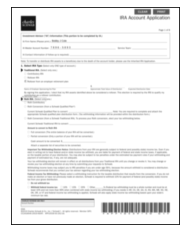


The company name is  Charles Schwab
Type of Form is  IRA Account Application
CheckBox Field:-  Roth Contributory


In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
company_name = []
type_of_form = []
checkbox_field = []
img = cv2.imread('/content/logo_detected_image.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()
print()
if prediction_dictionary[index1] in ['Charles Schwab', 'Merrill Lynch', 'Fidelity', 'American Funds', 'Ameritrade']:
  print("The company name is ", prediction_dictionary[index1])
  company_name.append(prediction_dictionary[index1])
  print("Type of Form is ", prediction_dictionary[index2])
  type_of_form.append(prediction_dictionary[index2])
  print("CheckBox Field:- ", tick_dictionary[index3])
  checkbox_field.append(tick_dictionary[index3])
else:
  print("The company name is ", prediction_dictionary[index2])
  company_name.append(prediction_dictionary[index2])
  print("Type of form is ", prediction_dictionary[index1])
  type_of_form.append(prediction_dictionary[index1])
  print("CheckBox Field:- ", tick_dictionary[index3])
  checkbox_field.append(tick_dictionary[index3])

### **SAVE RESULTS IN CSV FORMAT HERE [OD]**

*ABBREVIATION*:-

OD ----> OBJECT DETECTION

In [13]:
import pandas as pd
import csv
dataframe_dictionary={}
labels = ['Company Name[OD]', 'Type of Form[OD]', 'CheckBox Field[OD]']
data_fields = []
data_fields.append(company_name)
data_fields.append(type_of_form)
data_fields.append(checkbox_field)
dataframe_dictionary = dict(zip(labels, data_fields))
df = pd.DataFrame(dataframe_dictionary)
df

,Company Name[OD],Type of Form[OD],CheckBox Field[OD]
0,Merrill Lynch,Client Account Transfer Form,IRA


In [0]:
df.to_csv('/content/drive/My Drive/results_OD.csv', mode ='a', index = False, header=False)

In [15]:
df1 = pd.read_csv('/content/drive/My Drive/results_OD.csv')
df1

,Company Name[OD],Type of Form[OD],CheckBox Field[OD]
0,Merrill Lynch,Client Account Transfer Form,IRA


## **Named Entity Recognition [NER]**
Using the concepts of NER and OCR, we detect the text element fields in the form and then predict the category, type, and various other fields which are filled in the form.

**Input:-** *FORM* [PDF/JPEG/PNG]

**Output:-** *Category* ['Merrill Lynch', 'Charles Schwab'.......] *Type* ['IRA, Client Account Transfer Form'].......*Name*['Jacobs'....], *City*['New York'....]

### **IMPORTING NECESSARY LIBRARIES**

In [10]:
!pip install -U spacy

Requirement already up-to-date: spacy in /usr/local/lib/python3.6/dist-packages (2.2.4)


In [11]:
# Install pdf2image library
!pip install pdf2image

In [12]:
# Install poppler required for pdf2image
!apt-get install poppler-utils 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.10 [154 kB]
Fetched 154 kB in 1s (276 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 144439 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.10_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.10) ...
Setting up poppler-utils (0.62.0-2ubuntu2.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


### **Extract text from images.**

In [0]:
import os
from google.cloud import vision
import io
import pandas as pd

In [0]:
def detect_text_from_image(path):
    '''
    Function to extract texts from a image using GOOGLE CLOUD VISION API.
    Param:
        path : Full path of image.
    Return:
        Extracted text.
    '''
    # 
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/My First Project-dff60b5d1137.json"
    """Detects text in the file."""
    
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.document_text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

    return texts[0].description

# Detect text from PDF.

In [18]:
detect_text_from_image('/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Allan A Cook.png')

Texts:


"DTC8862\nACAT0671\nA BANK OF AMERICA COMPANY\nClient Account Transfer Form\nMERRILLS\nUse this form to transfer all or a portion of your account from\nanother financial institution to your Merrill Lynch, Pierce, Fenner &\nSmith Incorporated (“Merrill Lynch”) account.\nFor best results, please complete the information requested below in parts 1 to 4 using ALL CAPITAL letters and\nblack ink. If you need more room for information or signatures, use a copy of the relevant page or a blank sheet. Use\none form for each account that you're transferring.\nThings to know before you begin:\nMany firms transfer assets using an automated transfer process, which typically takes 5 to 6 business days. Other\nfirms either don't use the automated process or must process some assets manually, which takes more time. The\nfollowing estimated time frames for manual transfers are from the date of receipt of instructions by the deli\nfirm and may vary greatly:\n· Equities, bonds and options, approximately 1

### **Extract text from PDF**

In [0]:
from pdf2image import convert_from_path
from pathlib import Path

In [0]:
def detect_text_from_pdf(pdf_path, num_of_pages):

    # Extract customer_name from file name. Replace ' ' by '_'
    customer_name = Path(pdf_path).stem.replace(' ', '_')

    pages = convert_from_path(pdf_path, 100, fmt = 'jpg')

    pdf_text = []
    for i, page in enumerate(pages[0:num_of_pages]):
        temp_img_path = customer_name+ str(i) + '.jpg'
        page.save(temp_img_path)
        temp_text = detect_text_from_image(temp_img_path)
        pdf_text.append(temp_text)
        os.remove(temp_img_path)
    return '. '.join(pdf_text).replace("\n", " ")

### **TRAINING**

**Generate list of files**

In [0]:
from pathlib import PurePath

In [0]:
root_paths = ['/content/drive/My Drive/DOC-NER/Ameritrade Institutional',
              '/content/drive/My Drive/DOC-NER/Merrilllynch_CRA',
              '/content/drive/My Drive/DOC-NER/Schwab_IRA']

all_files_list = []
for root_path in root_paths:
    for path, subdirs, files in os.walk(root_path):
        for name in files:
            all_files_list.append(os.path.join(path, name))

In [0]:
all_files_list

['/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Zita J Rottman_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Teresa R Woods_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Susan T Green_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Robert R Sheppard_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Robert R Allan_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Robert J Barr_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Pamela E Byrd_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Nora R Mills_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Michael_C_Preston_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Mary H Craven_.pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Mary H Craven_ (1).pdf',
 '/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Marie P Watkins_.pdf',
 '/content/drive/My Driv

In [0]:
from tqdm import tqdm
extracted_text = []
customer_file_name = []

for path_ in tqdm(all_files_list):
    print(path_)
    file_name = path_.split('/')[-1]
    print(file_name)
    
    if Path(file_name).suffix == '.pdf':
        extracted_text.append(detect_text_from_pdf(pdf_path = path_, num_of_pages = 2))
        customer_file_name.append(file_name)
    elif Path(file_name).suffix == '.png' or 'jpg':
        extracted_text.append(detect_text_from_image(path_))
        customer_file_name.append(file_name)
    else:
        pass

  0%|          | 0/72 [00:00<?, ?it/s]

/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Zita J Rottman_.pdf
Zita J Rottman_.pdf
Texts:


  1%|▏         | 1/72 [00:01<02:12,  1.86s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Teresa R Woods_.pdf
Teresa R Woods_.pdf
Texts:


  3%|▎         | 2/72 [00:03<02:01,  1.74s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Susan T Green_.pdf
Susan T Green_.pdf
Texts:


  4%|▍         | 3/72 [00:04<01:54,  1.65s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Robert R Sheppard_.pdf
Robert R Sheppard_.pdf
Texts:


  6%|▌         | 4/72 [00:06<01:55,  1.69s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Robert R Allan_.pdf
Robert R Allan_.pdf
Texts:


  7%|▋         | 5/72 [00:08<01:49,  1.63s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Robert J Barr_.pdf
Robert J Barr_.pdf
Texts:


  8%|▊         | 6/72 [00:09<01:42,  1.56s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Pamela E Byrd_.pdf
Pamela E Byrd_.pdf
Texts:


 10%|▉         | 7/72 [00:10<01:39,  1.54s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Nora R Mills_.pdf
Nora R Mills_.pdf
Texts:


 11%|█         | 8/72 [00:12<01:39,  1.56s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Michael_C_Preston_.pdf
Michael_C_Preston_.pdf
Texts:


 12%|█▎        | 9/72 [00:13<01:36,  1.52s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Mary H Craven_.pdf
Mary H Craven_.pdf
Texts:


 14%|█▍        | 10/72 [00:15<01:37,  1.57s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Mary H Craven_ (1).pdf
Mary H Craven_ (1).pdf
Texts:


 15%|█▌        | 11/72 [00:17<01:33,  1.54s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Marie P Watkins_.pdf
Marie P Watkins_.pdf
Texts:


 17%|█▋        | 12/72 [00:18<01:34,  1.58s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Marie P Watkins_ (1).pdf
Marie P Watkins_ (1).pdf
Texts:


 18%|█▊        | 13/72 [00:20<01:30,  1.53s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Linda M Rice_.pdf
Linda M Rice_.pdf
Texts:


 19%|█▉        | 14/72 [00:21<01:26,  1.49s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Lili J Thomas_.pdf
Lili J Thomas_.pdf
Texts:


 21%|██        | 15/72 [00:23<01:26,  1.52s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Lili J Thomas_ (1).pdf
Lili J Thomas_ (1).pdf
Texts:


 22%|██▏       | 16/72 [00:24<01:21,  1.46s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Kristen W Hamilton_.pdf
Kristen W Hamilton_.pdf
Texts:


 24%|██▎       | 17/72 [00:25<01:19,  1.45s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Joseph T Green_.pdf
Joseph T Green_.pdf
Texts:


 25%|██▌       | 18/72 [00:27<01:17,  1.43s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Joseph T Green_ (1).pdf
Joseph T Green_ (1).pdf
Texts:


 26%|██▋       | 19/72 [00:28<01:16,  1.44s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Joshua T Truitt_.pdf
Joshua T Truitt_.pdf
Texts:


 28%|██▊       | 20/72 [00:30<01:17,  1.50s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Joseph N Weed_.pdf
Joseph N Weed_.pdf
Texts:


 29%|██▉       | 21/72 [00:32<01:17,  1.52s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/James P Osborne.pdf
James P Osborne.pdf
Texts:


 31%|███       | 22/72 [00:33<01:17,  1.55s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/James P Osborne (1).pdf
James P Osborne (1).pdf
Texts:


 32%|███▏      | 23/72 [00:35<01:14,  1.51s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Horace H Carpenter_.pdf
Horace H Carpenter_.pdf
Texts:


 33%|███▎      | 24/72 [00:36<01:13,  1.53s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Harold N Samaniego_.pdf
Harold N Samaniego_.pdf
Texts:


 35%|███▍      | 25/72 [00:38<01:11,  1.51s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Floyd K Brown_.pdf
Floyd K Brown_.pdf
Texts:


 36%|███▌      | 26/72 [00:39<01:09,  1.52s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Damian C Russell.pdf
Damian C Russell.pdf
Texts:


 38%|███▊      | 27/72 [00:41<01:13,  1.63s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Damian C Russell (1).pdf
Damian C Russell (1).pdf
Texts:


 39%|███▉      | 28/72 [00:42<01:07,  1.53s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Christopher V Herring_.pdf
Christopher V Herring_.pdf
Texts:


 40%|████      | 29/72 [00:44<01:05,  1.51s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Christine S Pyne_ (1).pdf
Christine S Pyne_ (1).pdf
Texts:


 42%|████▏     | 30/72 [00:45<01:05,  1.55s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Carl M Ecklund_ (1).pdf
Carl M Ecklund_ (1).pdf
Texts:


 43%|████▎     | 31/72 [00:47<01:03,  1.56s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Carl M Ecklund_ (2).pdf
Carl M Ecklund_ (2).pdf
Texts:


 44%|████▍     | 32/72 [00:48<01:01,  1.53s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Anne C Pugh_.pdf
Anne C Pugh_.pdf
Texts:


 46%|████▌     | 33/72 [00:50<01:00,  1.55s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Angelica E Senn_.pdf
Angelica E Senn_.pdf
Texts:


 47%|████▋     | 34/72 [00:52<00:59,  1.58s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Angelica E Senn_ (1).pdf
Angelica E Senn_ (1).pdf
Texts:


 49%|████▊     | 35/72 [00:53<00:57,  1.55s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Andrew_H_Jones_.pdf
Andrew_H_Jones_.pdf
Texts:


 50%|█████     | 36/72 [00:55<00:54,  1.51s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Allan_A_Cook_.pdf
Allan_A_Cook_.pdf
Texts:


 51%|█████▏    | 37/72 [00:56<00:51,  1.48s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Adrian_T_Clemens_.pdf
Adrian_T_Clemens_.pdf
Texts:


 53%|█████▎    | 38/72 [00:57<00:50,  1.47s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Adrian_T_Clemens_ (1).pdf
Adrian_T_Clemens_ (1).pdf
Texts:


 54%|█████▍    | 39/72 [00:59<00:49,  1.49s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Addie N McClellan_.pdf
Addie N McClellan_.pdf
Texts:


 56%|█████▌    | 40/72 [01:00<00:47,  1.50s/it]

Texts:
/content/drive/My Drive/DOC-NER/Ameritrade Institutional/Ada J Bardsley_.pdf
Ada J Bardsley_.pdf
Texts:


 57%|█████▋    | 41/72 [01:02<00:45,  1.47s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Samantha.png
Samantha.png


 58%|█████▊    | 42/72 [01:03<00:39,  1.31s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Rose R Webb.png
Rose R Webb.png


 60%|█████▉    | 43/72 [01:04<00:36,  1.25s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Robert N Sanford.png
Robert N Sanford.png


 61%|██████    | 44/72 [01:05<00:34,  1.22s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Robert E Regan.png
Robert E Regan.png


 62%|██████▎   | 45/72 [01:06<00:29,  1.10s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Richard K Kral.png
Richard K Kral.png


 64%|██████▍   | 46/72 [01:07<00:28,  1.09s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Peter E Trosper.png
Peter E Trosper.png


 65%|██████▌   | 47/72 [01:08<00:26,  1.06s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Harold L Brooks.pdf
Harold L Brooks.pdf
Texts:


 67%|██████▋   | 48/72 [01:10<00:29,  1.22s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Hae F Taylor.pdf
Hae F Taylor.pdf
Texts:


 68%|██████▊   | 49/72 [01:11<00:32,  1.41s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Gina F Johnson.pdf
Gina F Johnson.pdf
Texts:


 69%|██████▉   | 50/72 [01:13<00:32,  1.49s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Eula R Tucker.pdf
Eula R Tucker.pdf
Texts:


 71%|███████   | 51/72 [01:15<00:32,  1.53s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Edna T Peres.pdf
Edna T Peres.pdf
Texts:


 72%|███████▏  | 52/72 [01:17<00:32,  1.61s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Edith D Alexander.pdf
Edith D Alexander.pdf
Texts:


 74%|███████▎  | 53/72 [01:18<00:31,  1.66s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Diana J Alarcon.pdf
Diana J Alarcon.pdf
Texts:


 75%|███████▌  | 54/72 [01:20<00:28,  1.60s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Connie J Llanos.pdf
Connie J Llanos.pdf
Texts:


 76%|███████▋  | 55/72 [01:21<00:27,  1.60s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Cletus S Russo.pdf
Cletus S Russo.pdf
Texts:


 78%|███████▊  | 56/72 [01:23<00:25,  1.61s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Cheryl J Taylor.pdf
Cheryl J Taylor.pdf
Texts:


 79%|███████▉  | 57/72 [01:25<00:24,  1.63s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Candy T Lee.pdf
Candy T Lee.pdf
Texts:


 81%|████████  | 58/72 [01:26<00:22,  1.62s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Allan A Cook.png
Allan A Cook.png


 82%|████████▏ | 59/72 [01:27<00:18,  1.39s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Allan A Cook (1).png
Allan A Cook (1).png


 83%|████████▎ | 60/72 [01:28<00:14,  1.23s/it]

Texts:
/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Adrian Clemens.png
Adrian Clemens.png


 85%|████████▍ | 61/72 [01:29<00:12,  1.14s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Bobby_J_Cole_.pdf
Bobby_J_Cole_.pdf
Texts:


 86%|████████▌ | 62/72 [01:31<00:15,  1.54s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Thomas_L_Dodds_.pdf
Thomas_L_Dodds_.pdf
Texts:


 88%|████████▊ | 63/72 [01:34<00:16,  1.81s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Tammy_M_Pereira_.pdf
Tammy_M_Pereira_.pdf
Texts:


 89%|████████▉ | 64/72 [01:36<00:16,  2.00s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Richard_K_Forester_.pdf
Richard_K_Forester_.pdf
Texts:


 90%|█████████ | 65/72 [01:39<00:15,  2.20s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/James_B_Adams_.pdf
James_B_Adams_.pdf
Texts:


 92%|█████████▏| 66/72 [01:43<00:17,  2.89s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Edmund_L_Kroeger_.pdf
Edmund_L_Kroeger_.pdf
Texts:


 93%|█████████▎| 67/72 [01:46<00:13,  2.77s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Donna_E_Warren_.pdf
Donna_E_Warren_.pdf
Texts:


 94%|█████████▍| 68/72 [01:48<00:10,  2.71s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Daniel_P_Woods_.pdf
Daniel_P_Woods_.pdf
Texts:


 96%|█████████▌| 69/72 [01:51<00:08,  2.68s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Jonathan_K_Sanchez_.pdf
Jonathan_K_Sanchez_.pdf
Texts:


 97%|█████████▋| 70/72 [01:54<00:05,  2.69s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Karen_A_Sliva_.pdf
Karen_A_Sliva_.pdf
Texts:


 99%|█████████▊| 71/72 [01:56<00:02,  2.65s/it]

Texts:
/content/drive/My Drive/DOC-NER/Schwab_IRA/Patricia_J_Kim_.pdf
Patricia_J_Kim_.pdf
Texts:


100%|██████████| 72/72 [01:59<00:00,  1.66s/it]

Texts:


In [0]:
print(extracted_text[0])

D Ameritrade Institutional Reset Form ACCOUNT TRANSFER FORM TO TRANSFER YOUR EXISTING ACCOUNT TO TD AMERITRADE Account # 896547896 Advisor Code 987456932 Case # 1 PLEASE ATTACH A COPY OF YOUR LATEST STATEMENT. TD AMERITRADE ACCOUNT INFORMATION Account Title/Registration: Zita J Rottman Social Security Number/Tax ID: Clearing Number 404711495 0188 Individual Personal Trust Limited Liability Company Roth IRA Qualified Retirement Plan (Non-Qualified) Employer Plan Type: Joint Estate Partnership/Investment Club SEP IRA Simple IRA UTMA/UGMA Corporate Traditional IRA/Rollover RA Coverdell ESA Beneficiary IRA Other: 2 INFORMATION ON THE ACCOUNT YOU ARE TRANSFERRING FROM Account Title/Registration as shown on your statement Account Number Zita JRottman 870214590 Name of Delivering Firm: NVDA Physical Address of Firm (no PO BOX): Telephone Number (required): 200 Crescent Ct #1200 (541) 754-3010 Individual Personal Trust Limited Liability Company Roth IRA Qualified Retirement Plan (Non-Qualified

In [0]:
master_df = pd.DataFrame({'file_name' : customer_file_name,
                          'extracted_text' : extracted_text})

In [0]:
master_df.head()

,file_name,extracted_text
0,Zita J Rottman_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...
1,Teresa R Woods_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...
2,Susan T Green_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...
3,Robert R Sheppard_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...
4,Robert R Allan_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...


In [0]:
master_df['FILE NAME'] = master_df['file_name'].apply(lambda x: Path(x).stem)

In [0]:
master_df.head()

,file_name,extracted_text,FILE NAME
0,Zita J Rottman_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Zita J Rottman_
1,Teresa R Woods_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Teresa R Woods_
2,Susan T Green_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Susan T Green_
3,Robert R Sheppard_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Robert R Sheppard_
4,Robert R Allan_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Robert R Allan_


In [0]:
ira_df = pd.read_csv('/content/drive/My Drive/DOC-NER/IRA.csv')

In [0]:
ira_df.head()

,SLNo.,CATEGORY,FILE NAME,FILE SIZE,TITLE,DESCRIPTION,CLIENT,ADDRESS,SOCIAL SECURITY NO,RELATIONSHIP NO.,ACC NO,ACC TYPE,PHONE,CITY,EMAIL
0,0,Merrilllynch_CRA,Adrian Clemens,298 KB,Client Account Transfer Form,Use this form to transfer all or a portion of ...,Daniel C Paul,2 Seaport Ln,545401875,335-0012,89101454,IRA,5417542545,"Boston, MA,02210",Adrian@gmail.com
1,1,Merrilllynch_CRA,Peter E Trosper,295 KB,Client Account Transfer Form,Use this form to transfer all or a portion of ...,Grace P Lane,450 Park Ave #18,593746465,335-8978,66667894,IRA,5417543022,"New York, NY,10022",pater@gmail.com
2,2,Merrilllynch_CRA,Richard K Kral,298 KB,Client Account Transfer Form,Use this form to transfer all or a portion of ...,Jeanette B Hughes,340 Madison Ave,344466775,335-2125,79703212,IRA,5417543888,"New York, NY,10173",Richard@gmail.com
3,3,Merrilllynch_CRA,Robert E Regan,298 KB,Client Account Transfer Form,Use this form to transfer all or a portion of ...,Grace M Gracia,Search Results 11988 El Camino Real #600,417414892,335-0021,NaN,IRA,5417543010,"San Diego, CA,92130",Robert@gmail.com
4,4,Merrilllynch_CRA,Rose R Webb,298 KB,Client Account Transfer Form,Use this form to transfer all or a portion of ...,Donald S Cordova,11150CA-2 #200,539236318,335-4587,22560564,IRA,5417545879,"Los Angeles, CA,90025",Rose@gmail.com


In [0]:
final_df = pd.merge(master_df, ira_df, on='FILE NAME')

In [0]:
final_df.columns = ['file_name', 'extracted_text', 'FILE_NAME', 'SLNo', 'CATEGORY',
       'FILE_SIZE', 'TITLE', 'DESCRIPTION', 'CLIENT', 'ADDRESS',
       'SOCIAL_SECURITY_NO', 'RELATIONSHIP_NO', 'ACC_NO', 'ACC_TYPE', 'PHONE',
       'CITY', 'EMAIL']

In [0]:
final_df['PHONE'] = final_df['PHONE'].apply(lambda x: '('+str(x)[:3]+')'+' '+str(x)[3:6]+'-'+str(x)[6:10])

In [0]:
for i in final_df.columns:
    final_df[i] = final_df[i].astype('str') 

In [0]:
final_df.to_csv('final_df.csv', encoding='utf-8', index=False)

In [0]:
final_df.dtypes

file_name             object
extracted_text        object
FILE_NAME             object
SLNo                  object
CATEGORY              object
FILE_SIZE             object
TITLE                 object
DESCRIPTION           object
CLIENT                object
ADDRESS               object
SOCIAL_SECURITY_NO    object
RELATIONSHIP_NO       object
ACC_NO                object
ACC_TYPE              object
PHONE                 object
CITY                  object
EMAIL                 object
dtype: object

**NER**

In [0]:
import itertools

In [0]:
final_df = pd.read_csv("final_df.csv")
for i in final_df.columns:
    final_df[i] = final_df[i].astype('str') 

In [0]:
final_df.columns = ['file_name', 'extracted_text', 'FILE_NAME', 'SLNo', 'CATEGORY',
       'FILE_SIZE', 'TITLE', 'DESCRIPTION', 'CLIENT', 'ADDRESS',
       'SOCIAL_SECURITY_NO', 'RELATIONSHIP_NO', 'ACC_NO', 'ACC_TYPE', 'PHONE',
       'CITY', 'EMAIL']

In [0]:
final_df['TITLE'] = final_df['TITLE'].apply(lambda x: x.replace('IRA ', ''))

In [0]:
final_df

,file_name,extracted_text,FILE_NAME,SLNo,CATEGORY,FILE_SIZE,TITLE,DESCRIPTION,CLIENT,ADDRESS,SOCIAL_SECURITY_NO,RELATIONSHIP_NO,ACC_NO,ACC_TYPE,PHONE,CITY,EMAIL
0,Zita J Rottman_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Zita J Rottman_,40,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Zita J Rottman,200 Crescent Ct#1200,404711495,nan,870214590,NVDA,(541) 754-3010,nan,nan
1,Teresa R Woods_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Teresa R Woods_,59,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Teresa R Woods,3403 Richards Avenue,139394344,nan,875032122,BABA,(541) 754-1100,nan,nan
2,Susan T Green_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Susan T Green_,28,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Susan T Green,3116 Wright Court,517144655,nan,856901266,TGT,(541) 754-3044,nan,nan
3,Robert R Sheppard_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Robert R Sheppard_,27,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Robert R Sheppard,3291 Hall Street,545401844,nan,987012777,NVDA,(541) 754-3222,nan,nan
4,Robert J Barr_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Robert J Barr_,26,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Robert J Barr,4567 Willison Street,139394322,nan,875032188,BABA,(541) 754-3022,nan,nan
5,Pamela E Byrd_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Pamela E Byrd_,25,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Pamela E Byrd,514 Stutler Lane,139394344,nan,875032122,GOOG,(541) 754-3033,nan,nan
6,Nora R Mills_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Nora R Mills_,57,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Nora R Mills,4010 Mulberry Street,545401870,nan,987012344,JNJ,(541) 754-3055,nan,nan
7,Michael_C_Preston_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Michael_C_Preston_,48,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Michael C Preston,4645 Hope Street,139394339,nan,875032106,BBY,(541) 754-3044,nan,nan
8,Mary H Craven_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Mary H Craven_,24,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Mary H Craven,2397 Deans Lane,545401875,nan,987012322,JNJ,(541) 754-3055,nan,nan
9,Marie P Watkins_.pdf,D Ameritrade Institutional Reset Form ACCOUNT ...,Marie P Watkins_,38,Ameritrade Institutional,142 KB,ACCOUNT TRANSFER FORM,A. Transfer from an ACAT eligible Brokerage Fi...,Marie P Watkins,222 Berkeley St #15,517144661,nan,856901203,TGT,(541) 754-3012,nan,nan


In [0]:
from sklearn.utils import shuffle

In [0]:
from sklearn.model_selection import train_test_split
import spacy
from spacy.util import decaying
from spacy.matcher import PhraseMatcher
from spacy.lang.en import English
from spacy.util import minibatch, compounding
from spacy.gold import GoldParse 
from spacy.scorer import Scorer
import random

In [0]:
final_df = final_df.sample(frac=1)
final_df.reset_index(drop = True, inplace = True)

train, test = train_test_split(final_df, test_size=0.1)

In [0]:
train.shape, test.shape

((54, 17), (6, 17))

In [0]:
['TITLE', 'DESCRIPTION', 'CLIENT', 'ADDRESS',
       'SOCIAL_SECURITY_NO', 'RELATIONSHIP_NO', 'ACC_NO', 'ACC_TYPE', 'PHONE',
       'CITY', 'EMAIL']

['TITLE',
 'DESCRIPTION',
 'CLIENT',
 'ADDRESS',
 'SOCIAL_SECURITY_NO',
 'RELATIONSHIP_NO',
 'ACC_NO',
 'ACC_TYPE',
 'PHONE',
 'CITY',
 'EMAIL']

In [0]:
nlp = English()
#nlp = spacy.load("en_trf_bertbaseuncased_lg")
#nlp.vocab, attr='lemma', validate=True

In [0]:
#TITLE_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
TITLE_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
TITLE_patterns = [nlp(i) for i in final_df['TITLE'].to_list()]
TITLE_matcher.add("TITLE", None,*TITLE_patterns)

In [0]:
DESCRIPTION_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
DESCRIPTION_patterns = [nlp(i) for i in final_df['DESCRIPTION'].to_list()]
DESCRIPTION_matcher.add("DESCRIPTION", None,*DESCRIPTION_patterns)

In [0]:
CLIENT_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
CLIENT_patterns = [nlp(i) for i in final_df['CLIENT'].to_list()]
CLIENT_matcher.add("CLIENT", None,*CLIENT_patterns)

In [0]:

ADDRESS_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
ADDRESS_patterns = [nlp(i) for i in final_df['ADDRESS'].to_list()]
ADDRESS_matcher.add("ADDRESS", None,*ADDRESS_patterns)

In [0]:
SOCIAL_SECURITY_NO_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
SOCIAL_SECURITY_NO_patterns = [nlp(i) for i in final_df['SOCIAL_SECURITY_NO'].to_list()]
SOCIAL_SECURITY_NO_matcher.add("SOCIAL_SECURITY_NO", None,*SOCIAL_SECURITY_NO_patterns)

In [0]:
RELATIONSHIP_NO_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
RELATIONSHIP_NO_patterns = [nlp(i) for i in final_df['RELATIONSHIP_NO'].to_list()]
RELATIONSHIP_NO_matcher.add("RELATIONSHIP_NO", None,*RELATIONSHIP_NO_patterns)

In [0]:
ACC_NO_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
ACC_NO_patterns = [nlp(i) for i in final_df['ACC_NO'].to_list()]
ACC_NO_matcher.add("ACC_NO", None,*ACC_NO_patterns)

In [0]:
ACC_TYPE_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
ACC_TYPE_patterns = [nlp(i) for i in final_df['ACC_TYPE'].to_list()]
ACC_TYPE_matcher.add("ACC_TYPE", None,*ACC_TYPE_patterns)

In [0]:
PHONE_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
PHONE_patterns = [nlp(i) for i in final_df['PHONE'].to_list()]
PHONE_matcher.add("PHONE", None,*PHONE_patterns)

In [0]:
CITY_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
CITY_patterns = [nlp(i) for i in final_df['CITY'].to_list()]
CITY_matcher.add("CITY", None,*CITY_patterns)

In [0]:
EMAIL_matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
EMAIL_patterns = [nlp(i) for i in final_df['EMAIL'].to_list()]
EMAIL_matcher.add("EMAIL", None,*EMAIL_patterns)

In [0]:
TRAIN_TEXTS = train['extracted_text'].tolist()
TEST_TEXTS = test['extracted_text'].tolist()

In [0]:
TRAINING_DATA = []

# Create a Doc object for each text in TEXTS
for doc in tqdm(nlp.pipe(TRAIN_TEXTS)):
    # Match on the doc and create a list of matched spans
    TITLE_spans = [doc[start:end] for match_id, start, end in TITLE_matcher(doc)]
    DESCRIPTION_spans = [doc[start:end] for match_id, start, end in DESCRIPTION_matcher(doc)]
    CLIENT_spans = [doc[start:end] for match_id, start, end in CLIENT_matcher(doc)]
    ADDRESS_spans = [doc[start:end] for match_id, start, end in ADDRESS_matcher(doc)]
    SOCIAL_SECURITY_NO_spans = [doc[start:end] for match_id, start, end in SOCIAL_SECURITY_NO_matcher(doc)]
    RELATIONSHIP_NO_spans = [doc[start:end] for match_id, start, end in RELATIONSHIP_NO_matcher(doc)]
    ACC_NO_spans = [doc[start:end] for match_id, start, end in ACC_NO_matcher(doc)]
    ACC_TYPE_spans = [doc[start:end] for match_id, start, end in ACC_TYPE_matcher(doc)]
    PHONE_spans = [doc[start:end] for match_id, start, end in PHONE_matcher(doc)]
    CITY_spans = [doc[start:end] for match_id, start, end in CITY_matcher(doc)]
    EMAIL_spans = [doc[start:end] for match_id, start, end in EMAIL_matcher(doc)]
    
    # Get (start character, end character, label) tuples of matches
    entities = [(span.start_char, span.end_char, "TITLE") for span in TITLE_spans]
    entities.extend([(span.start_char, span.end_char, "DESCRIPTION") for span in DESCRIPTION_spans])
    entities.extend([(span.start_char, span.end_char, "CLIENT") for span in CLIENT_spans])
    entities.extend([(span.start_char, span.end_char, "ADDRESS") for span in ADDRESS_spans])
    entities.extend([(span.start_char, span.end_char, "SOCIAL_SECURITY_NO") for span in SOCIAL_SECURITY_NO_spans])
    entities.extend([(span.start_char, span.end_char, "RELATIONSHIP_NO") for span in RELATIONSHIP_NO_spans])
    entities.extend([(span.start_char, span.end_char, "ACC_NO") for span in ACC_NO_spans])
    entities.extend([(span.start_char, span.end_char, "ACC_TYPE") for span in ACC_TYPE_spans])
    entities.extend([(span.start_char, span.end_char, "PHONE") for span in PHONE_spans])
    entities.extend([(span.start_char, span.end_char, "CITY") for span in CITY_spans])
    entities.extend([(span.start_char, span.end_char, "EMAIL") for span in EMAIL_spans])

    # Format the matches as a (doc.text, entities) tuple
    training_example = (doc.text, {"entities": entities})
    # Append the example to the training data
    TRAINING_DATA.append(training_example)

54it [00:00, 447.43it/s]


In [0]:
# Remove repetated of same type entity
for i,_ in enumerate(TRAINING_DATA):
    TRAINING_DATA[i][1]['entities'] = ([next(b) for a, b in itertools.groupby( 
                         TRAINING_DATA[i][1]['entities'], lambda y: y[2])]) 

In [0]:
TRAINING_DATA[0]

('CLEAR PRINT IRA Account Application charles SCHWAB Page 1 of 8 Investment Advisor ("IA") Information (This portion to be completed by IA.) IA Firm Name (Please print.): Richard K Forester IA Master Account Number: 745 7. 7 7 9 5 Service Team: IA Contact Information (if follow-up is required): Note: To transfer or distribute IRA assets to a beneficiary due to the death of the account holder, please use the inherited IRA Application. 1. Select IRA Type (Select only ONE type of account.) Traditional IRA. (Select only one.) Contributory IRA Rollover IRA Rollover from an employer retirement plan $ Name of Employer Sponsoring the Plan Approximate Total Value of Distribution Expected Distribution Date By signing this application, I elect that my IRA assets identified above be considered a rollover. This election is required required by the IRS to qualify my contribution as a rollover contribution. Roth IRA. (Select only one.) Roth Contributory Roth Conversion (from a Schwab Qualified Plan*)

In [0]:
TESTING_DATA = []

# Create a Doc object for each text in TEXTS
for doc in tqdm(nlp.pipe(TEST_TEXTS)):
    # Match on the doc and create a list of matched spans
    TITLE_spans = [doc[start:end] for match_id, start, end in TITLE_matcher(doc)]
    DESCRIPTION_spans = [doc[start:end] for match_id, start, end in DESCRIPTION_matcher(doc)]
    CLIENT_spans = [doc[start:end] for match_id, start, end in CLIENT_matcher(doc)]
    ADDRESS_spans = [doc[start:end] for match_id, start, end in ADDRESS_matcher(doc)]
    SOCIAL_SECURITY_NO_spans = [doc[start:end] for match_id, start, end in SOCIAL_SECURITY_NO_matcher(doc)]
    RELATIONSHIP_NO_spans = [doc[start:end] for match_id, start, end in RELATIONSHIP_NO_matcher(doc)]
    ACC_NO_spans = [doc[start:end] for match_id, start, end in ACC_NO_matcher(doc)]
    ACC_TYPE_spans = [doc[start:end] for match_id, start, end in ACC_TYPE_matcher(doc)]
    PHONE_spans = [doc[start:end] for match_id, start, end in PHONE_matcher(doc)]
    CITY_spans = [doc[start:end] for match_id, start, end in CITY_matcher(doc)]
    EMAIL_spans = [doc[start:end] for match_id, start, end in EMAIL_matcher(doc)]
    
    # Get (start character, end character, label) tuples of matches
    entities = [(span.start_char, span.end_char, "TITLE") for span in TITLE_spans]
    entities.extend([(span.start_char, span.end_char, "DESCRIPTION") for span in DESCRIPTION_spans])
    entities.extend([(span.start_char, span.end_char, "CLIENT") for span in CLIENT_spans])
    entities.extend([(span.start_char, span.end_char, "ADDRESS") for span in ADDRESS_spans])
    entities.extend([(span.start_char, span.end_char, "SOCIAL_SECURITY_NO") for span in SOCIAL_SECURITY_NO_spans])
    entities.extend([(span.start_char, span.end_char, "RELATIONSHIP_NO") for span in RELATIONSHIP_NO_spans])
    entities.extend([(span.start_char, span.end_char, "ACC_NO") for span in ACC_NO_spans])
    entities.extend([(span.start_char, span.end_char, "ACC_TYPE") for span in ACC_TYPE_spans])
    entities.extend([(span.start_char, span.end_char, "PHONE") for span in PHONE_spans])
    entities.extend([(span.start_char, span.end_char, "CITY") for span in CITY_spans])
    entities.extend([(span.start_char, span.end_char, "EMAIL") for span in EMAIL_spans])

    # Format the matches as a (doc.text, entities) tuple
    testing_example = (doc.text, {"entities": entities})
    # Append the example to the testing data
    TESTING_DATA.append(testing_example)

6it [00:00, 441.18it/s]


In [0]:
# Remove repetated of same type entity
for i,_ in enumerate(TESTING_DATA):
    TESTING_DATA[i][1]['entities'] = ([next(b) for a, b in itertools.groupby( 
                         TESTING_DATA[i][1]['entities'], lambda y: y[2])]) 

In [0]:
LABEL = ['TITLE',
 'DESCRIPTION',
 'CLIENT',
 'ADDRESS',
 'SOCIAL_SECURITY_NO',
 'RELATIONSHIP_NO',
 'ACC_NO',
 'ACC_TYPE',
 'PHONE',
 'CITY',
 'EMAIL']

In [0]:
os.getcwd()

'/content'

In [0]:
# sets the model, output directory and training iterations 
model = None
output_dir=os.getcwd()
n_iter=100

# Checks to see if there is a current model or no model. In this case I will be starting with a blank model 

if model is not None:
    nlp1 = spacy.load(model)  # load existing spaCy model
    print("Loaded model '%s'" % model)
else:
    nlp1 = spacy.blank('en')  # create blank Language class
    print("Created blank 'en' model")



# create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
if 'ner' not in nlp1.pipe_names:
    ner = nlp1.create_pipe('ner')
    nlp1.add_pipe(ner, last=True)
# otherwise, get it so we can add labels
else:
    ner = nlp1.get_pipe('ner')

# add labels
for _, annotations in TRAINING_DATA:
    for ent in annotations.get('entities'):
        ner.add_label(ent[2])

    # get names of other pipes to disable them during training
other_pipes = [pipe for pipe in nlp1.pipe_names if pipe != 'ner']
with nlp1.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp1.begin_training()
    for itn in range(n_iter):
        random.shuffle(TRAINING_DATA)
        losses = {}
        for text, annotations in tqdm(TRAINING_DATA):
            nlp1.update(
                [text],  # batch of texts
                [annotations],  # batch of annotations
                drop=0.5,  # dropout - make it harder to memorise data
                sgd=optimizer,  # callable to update weights
                losses=losses)
        print(losses)

  0%|          | 0/54 [00:00<?, ?it/s]

Created blank 'en' model


  2%|▏         | 1/54 [00:00<00:07,  7.31it/s]

{'ner': 11087.7039791569}


  2%|▏         | 1/54 [00:00<00:06,  7.79it/s]

{'ner': 2174.1047905866485}


  2%|▏         | 1/54 [00:00<00:09,  5.76it/s]

{'ner': 2739.8686885152047}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 4177.244848710565}


  2%|▏         | 1/54 [00:00<00:09,  5.67it/s]

{'ner': 4293.495151394191}


  2%|▏         | 1/54 [00:00<00:07,  7.07it/s]

{'ner': 3291.9419982070067}


  2%|▏         | 1/54 [00:00<00:09,  5.55it/s]

{'ner': 3278.7611502333834}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 2875.180894629758}


  2%|▏         | 1/54 [00:00<00:07,  6.83it/s]

{'ner': 3086.5937583572336}


  2%|▏         | 1/54 [00:00<00:08,  6.01it/s]

{'ner': 2821.7238408022367}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 2147.684259831193}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 2391.365287897078}


  2%|▏         | 1/54 [00:00<00:09,  5.47it/s]

{'ner': 2115.8864168626533}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 989.4735448839273}


  2%|▏         | 1/54 [00:00<00:08,  5.93it/s]

{'ner': 1397.6304966022162}


  2%|▏         | 1/54 [00:00<00:09,  5.50it/s]

{'ner': 1065.0731733882994}


  2%|▏         | 1/54 [00:00<00:10,  5.17it/s]

{'ner': 702.2375457737116}


  2%|▏         | 1/54 [00:00<00:08,  5.97it/s]

{'ner': 994.1188188991882}


  2%|▏         | 1/54 [00:00<00:06,  7.65it/s]

{'ner': 621.5190657649184}


  2%|▏         | 1/54 [00:00<00:09,  5.80it/s]

{'ner': 415.0127663592825}


  2%|▏         | 1/54 [00:00<00:07,  7.07it/s]

{'ner': 498.7755624292576}


  2%|▏         | 1/54 [00:00<00:07,  7.33it/s]

{'ner': 479.4697919654164}


  2%|▏         | 1/54 [00:00<00:09,  5.33it/s]

{'ner': 552.1775522430951}


  2%|▏         | 1/54 [00:00<00:08,  6.11it/s]

{'ner': 388.0339429999077}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 457.6209703315199}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 364.63239348542675}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 472.25133270584394}


  2%|▏         | 1/54 [00:00<00:10,  5.20it/s]

{'ner': 494.61131311745}


  2%|▏         | 1/54 [00:00<00:09,  5.31it/s]

{'ner': 386.9482298509672}


  2%|▏         | 1/54 [00:00<00:09,  5.35it/s]

{'ner': 351.9688847854862}


  2%|▏         | 1/54 [00:00<00:09,  5.56it/s]

{'ner': 367.69499491519423}


  2%|▏         | 1/54 [00:00<00:09,  5.66it/s]

{'ner': 397.55774534470913}


  2%|▏         | 1/54 [00:00<00:10,  5.05it/s]

{'ner': 358.7426491305614}


  2%|▏         | 1/54 [00:00<00:10,  5.16it/s]

{'ner': 358.99523395449694}


  2%|▏         | 1/54 [00:00<00:08,  5.99it/s]

{'ner': 438.03390686192176}


  2%|▏         | 1/54 [00:00<00:09,  5.42it/s]

{'ner': 325.3864359020975}


  2%|▏         | 1/54 [00:00<00:09,  5.71it/s]

{'ner': 292.8631046104406}


  2%|▏         | 1/54 [00:00<00:10,  5.03it/s]

{'ner': 396.8826665209722}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 579.8441783361243}


  2%|▏         | 1/54 [00:00<00:08,  5.97it/s]

{'ner': 271.8993322223957}


  2%|▏         | 1/54 [00:00<00:09,  5.82it/s]

{'ner': 260.4649171992719}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 234.27482465709195}


  2%|▏         | 1/54 [00:00<00:07,  6.91it/s]

{'ner': 353.3698179707794}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 242.33859240227497}


  2%|▏         | 1/54 [00:00<00:07,  6.65it/s]

{'ner': 218.97832157500622}


  2%|▏         | 1/54 [00:00<00:09,  5.80it/s]

{'ner': 246.84368979880665}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 248.16709361284313}


  2%|▏         | 1/54 [00:00<00:07,  7.38it/s]

{'ner': 206.58324700322257}


  2%|▏         | 1/54 [00:00<00:07,  6.64it/s]

{'ner': 519.3937476516476}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 213.1529732412258}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 233.31093703145197}


  2%|▏         | 1/54 [00:00<00:08,  6.53it/s]

{'ner': 391.5440655895391}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 263.68845694198626}


  2%|▏         | 1/54 [00:00<00:09,  5.60it/s]

{'ner': 284.4741183028747}


  2%|▏         | 1/54 [00:00<00:09,  5.84it/s]

{'ner': 163.491279763878}


  2%|▏         | 1/54 [00:00<00:09,  5.76it/s]

{'ner': 148.96637270354677}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 195.44988858808307}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 122.80586182365973}


  2%|▏         | 1/54 [00:00<00:10,  5.29it/s]

{'ner': 176.0286785238561}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 135.68950843333513}


  2%|▏         | 1/54 [00:00<00:09,  5.51it/s]

{'ner': 129.6803814834895}


  2%|▏         | 1/54 [00:00<00:10,  5.30it/s]

{'ner': 136.513989990263}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 129.29148016888956}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 189.33133549880426}


  2%|▏         | 1/54 [00:00<00:08,  6.31it/s]

{'ner': 127.56805163554121}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 112.8585234865656}


  2%|▏         | 1/54 [00:00<00:10,  5.15it/s]

{'ner': 90.22671986907437}


  2%|▏         | 1/54 [00:00<00:08,  5.93it/s]

{'ner': 97.95032719027357}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 99.12121126391314}


  2%|▏         | 1/54 [00:00<00:08,  6.44it/s]

{'ner': 132.48128018715292}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 73.6669477932417}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 117.05807283945448}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 79.2215959663484}


  2%|▏         | 1/54 [00:00<00:08,  6.15it/s]

{'ner': 100.58569673276284}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 73.04157698064326}


  2%|▏         | 1/54 [00:00<00:10,  5.03it/s]

{'ner': 83.50982504076848}


  2%|▏         | 1/54 [00:00<00:08,  5.97it/s]

{'ner': 86.9932541268709}


  2%|▏         | 1/54 [00:00<00:10,  5.20it/s]

{'ner': 81.31185391290586}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 77.5876723137218}


  2%|▏         | 1/54 [00:00<00:08,  6.06it/s]

{'ner': 88.68230476041265}


  2%|▏         | 1/54 [00:00<00:10,  5.25it/s]

{'ner': 66.60361335605711}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 92.31266204551139}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 72.78701384194899}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 51.357049446069674}


  2%|▏         | 1/54 [00:00<00:08,  6.52it/s]

{'ner': 63.20187290210902}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 41.62069276709699}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 57.02695245136369}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 50.80173698724199}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 84.94128349890832}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 77.37891163140316}


  2%|▏         | 1/54 [00:00<00:08,  6.24it/s]

{'ner': 73.39832495616213}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 92.90260450603067}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 62.9343855661372}


  2%|▏         | 1/54 [00:00<00:10,  5.23it/s]

{'ner': 23.494208157065835}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 48.48141223841683}


  2%|▏         | 1/54 [00:00<00:10,  5.18it/s]

{'ner': 47.49435890335744}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 52.75884909358243}


  0%|          | 0/54 [00:00<?, ?it/s]

{'ner': 49.722764509676374}


  2%|▏         | 1/54 [00:00<00:08,  6.45it/s]

{'ner': 28.704205145069075}


100%|██████████| 54/54 [00:11<00:00,  4.85it/s]

{'ner': 46.66840662136227}


In [0]:
output_dir='/content/drive/My Drive/model'
print(output_dir)

# save model to output directory
if output_dir is not None:
    output_dir = Path(output_dir)
if not output_dir.exists():
    output_dir.mkdir()
nlp1.to_disk(output_dir)
print("Saved model to", output_dir)

/content/drive/My Drive/model
Saved model to /content/drive/My Drive/model


In [0]:
# test the saved model
directory_of_saved_model = '/content/drive/My Drive/model'
output_dir = directory_of_saved_model
print("Loading from", output_dir)
nlp2 = spacy.load(output_dir)

def predict_entities(text, nlp2):
    # test the trained model
    doc = nlp2(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

Loading from /content/drive/My Drive/model


In [0]:
out = predict_entities(TEST_TEXTS[0], nlp2)

In [0]:
out

[('IRA', 'ACC_TYPE'),
 ('Account Application', 'TITLE'),
 ('Thomas L Dodds', 'CLIENT'),
 ('3977 Hillview Drive', 'ADDRESS'),
 ('(541) 754-1100', 'PHONE'),
 ('360-80-6429', 'SOCIAL_SECURITY_NO'),
 ('Bobby@gmail.com', 'EMAIL')]

In [0]:
out = predict_entities(TEST_TEXTS[1], nlp2)
out

[('IRA', 'ACC_TYPE'),
 ('Account Application', 'TITLE'),
 ('2465 Richison Drive', 'ADDRESS'),
 ('(541) 754-3011', 'PHONE'),
 ('360-80-6429', 'SOCIAL_SECURITY_NO'),
 ('Patricia@gmail.com', 'EMAIL')]

In [0]:
out = predict_entities(TEST_TEXTS[2], nlp2)
out

[('IRA', 'ACC_TYPE'),
 ('Account Application', 'TITLE'),
 ('4929 B Street', 'ADDRESS'),
 ('1459 Rockford Road', 'ADDRESS'),
 ('(541) 754-3088', 'PHONE'),
 ('680-12-0244', 'SOCIAL_SECURITY_NO'),
 ('Jonathan@gmail.com', 'EMAIL')]

In [0]:
out = predict_entities(TEST_TEXTS[3], nlp2)
out

[('ACCOUNT TRANSFER FORM', 'TITLE'),
 ('125014588', 'ACC_NO'),
 ('Mary H Craven', 'CLIENT'),
 ('545401875', 'SOCIAL_SECURITY_NO'),
 ('IRA', 'ACC_TYPE'),
 ('987012322', 'ACC_NO'),
 ('2397 Deans Lane', 'ADDRESS'),
 ('(541) 754-3055', 'PHONE')]

In [0]:
out = predict_entities(TEST_TEXTS[4], nlp2)
out

[('IRA', 'ACC_TYPE'),
 ('Account Application', 'TITLE'),
 ('Melissa R Waterbury', 'CLIENT'),
 ('213 Payne Street', 'ADDRESS'),
 ('4715', 'ACC_NO'),
 ('(541) 754-3016', 'PHONE'),
 ('337-01-4322', 'SOCIAL_SECURITY_NO'),
 ('(541) 754-3056', 'PHONE'),
 ('Karen@gmail.com', 'EMAIL')]

In [0]:
out = predict_entities(TEST_TEXTS[5], nlp2)
out

[('Client Account Transfer Form', 'TITLE'),
 ('IRA', 'ACC_TYPE'),
 ('(541) 754-3010', 'PHONE'),
 ('Grace M Garcia', 'CLIENT'),
 ('Search Results 11988 El', 'ADDRESS'),
 ('600', 'ACC_NO'),
 ('San Diego, CA,92130', 'CITY'),
 ('417414892', 'SOCIAL_SECURITY_NO'),
 ('335-0021', 'RELATIONSHIP_NO'),
 ('Robert@gmail.com', 'EMAIL')]

In [0]:
len(TEST_TEXTS)

6

In [0]:
TEST_TEXTS[5]

"DTC8862\nACAT0671\nA BANK OF AMERICA COMPANY\nClient Account Transfer Form\nMERRILL\nUse this form to transfer all or a portion of your account from\nanother financial institution to your Merrill Lynch, Pierce, Fenner &\nSmith Incorporated (“Merrill Lynch”) account.\nFor best results, please complete the information requested below in parts 1 to 4 using ALL CAPITAL letters and\nblack ink. If you need more room for information or signatures, use a copy of the relevant page or a blank sheet. Use\none form for each account that you're transferring.\nThings to know before you begin:\nMany firms transfer assets using an automated transfer process, which typically takes to 6 business days. Other\nfirms either don't use the automated process or must process some assets manually, which takes more time. The\nfollowing estimated time frames for manual transfers are from the date of eipt of instructions by the deli\nfirm and may vary greatly:\n· Equities, bonds and options, approximately 15 busi

### **Prediction - OCR then NER**

In [21]:
import spacy
directory_of_saved_model = '/content/drive/My Drive/model'
output_dir = directory_of_saved_model
print("Loading from", output_dir)
nlp2 = spacy.load(output_dir)

def predict_entities(text, nlp2):
    # test the trained model
    doc = nlp2(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

Loading from /content/drive/My Drive/model


In [0]:
def predict_ocr_ner(path_): 
    print(path_)
    file_name = path_.split('/')[-1]
    print(file_name)
    if Path(file_name).suffix == '.pdf':
        extracted_text = detect_text_from_pdf(pdf_path = path_, num_of_pages = 2)
        return predict_entities(extracted_text, nlp2)
    elif Path(file_name).suffix == '.png' or 'jpg':
        extracted_text = detect_text_from_image(path_)
        return predict_entities(extracted_text, nlp2)
    else:
        pass

### **FOR PNG FILES**

In [0]:
result_text = detect_text_from_image('/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Adrian Clemens.png')

print(result_text)

#for path in path_list:
#    text_ = detect_text_from_image(path)
#    # write to file 

Texts:
DTC8862
ACAT0671
A BANK OF AMERICA COMPANY
Client Account Transfer Form
Use this form to transfer all or a portion of your account from
MERRILL
another financial institution to your Merrill Lynch, Pierce, Fenner &
Smith Incorporated (“Merrill Lynch”) account.
For best results, please complete the information requested below in parts 1 to 4 using ALL CAPITAL letters and
black ink. If you need more room for information or signatures, use a copy of the relevant page or a blank sheet. Use
one form for each account that you're transferring.
Things to know before you begin:
Many firms transfer assets using an automated transfer process, which typically takes 5 to 6 business days. Other
firms either don't use the automated process or must process some assets manually, which takes more time. The
following estimated time frames for manual transfers are from the date of eipt of instructions by the deli
firm and may vary greatly:
· Equities, bonds and options, approximately 15 business day

In [0]:
new_pdf = '/content/drive/My Drive/DOC-NER/Merrilllynch_CRA/Adrian Clemens.png'
result = predict_ocr_ner(new_pdf)
result

In [0]:
ner_dict = dict(result)
ner_dict

In [0]:
new_dict = {} 
for key, value in ner_dict.items(): 
   if value in new_dict: 
       new_dict[value].append(key) 
   else: 
       new_dict[value]=[key] 

In [0]:
import pandas as pd
df = pd.DataFrame(new_dict)
df

In [0]:
df.to_csv('results1.csv', mode ='a', index = False, header=False)

In [0]:
df1 = pd.read_csv('results1.csv')
df1

In [0]:
a = pd.read_csv('results.csv')
b = pd.read_csv('results1.csv')
merged = a.merge(b, right_index=True, left_index=True)
merged.to_csv('FinalResults.csv', index = False)
merged

### **FOR PDF FILES**

In [23]:
from pdf2image import convert_from_path
from pathlib import Path
import os
pdf_file_path = PDF_PATH
pages = convert_from_path(pdf_file_path, 200)
pdf_file_path_ = pdf_file_path.replace(' ', '_')
pdf_file_path_ = Path(pdf_file_path_).stem
for page in pages[0:2]:
    #print(pdf_file_path_+ '_'+page+'.jpg', 'JPEG')

    #page.save(pdf_file_path_+ '_'+page+'.jpg', 'JPEG')
    page.save(pdf_file_path_ + '.jpg')
page.save(pdf_file_path_ + '.jpg')
result_text = detect_text_from_image(pdf_file_path_ + '.jpg')

print(result_text)

Texts:
Page 2 of 8
1. Select IRA Type (Continued)
*A Schwab Qualified Plan is a Schwab Profit Sharing Qualified Retirement Plan or Keogh, a Schwab Individual 401(k), or a Schwab 403(b)(7) Account.
State Income Tax Withholding: State tax withholding may be required from your distribution. In some cases, you may elect not to have withholding
apply, or you may elect to increase the rate of withholding. In other cases, state tax withholding is not available. Refer to the State Income Tax
Withholding Information sheet for specific information concerning your state's withholding rates.
While Schwab makes every effort to obtain information about state tax laws from sources believed to be reliable, Schwab cannot guarantee the
accuracy or timeliness of state tax withholding information because state laws are subject to constant change and interpretation. We recommend
that you contact your tax advisor regarding your tax withholding elections and to answer any questions that you may have regardin

In [24]:
new_pdf = PDF_PATH
result = predict_ocr_ner(new_pdf)
result

/content/Bobby_J_Cole_.pdf
Bobby_J_Cole_.pdf
Texts:
Texts:


[('IRA', 'ACC_TYPE'),
 ('Account Application', 'TITLE'),
 ('Thomas L Dodds', 'CLIENT'),
 ('3977 Hillview Drive', 'ADDRESS'),
 ('(541) 754-1100', 'PHONE'),
 ('360-80-6429', 'SOCIAL_SECURITY_NO'),
 ('Bobby@gmail.com', 'EMAIL')]

In [25]:
ner_dict = dict(result)
ner_dict

{'(541) 754-1100': 'PHONE',
 '360-80-6429': 'SOCIAL_SECURITY_NO',
 '3977 Hillview Drive': 'ADDRESS',
 'Account Application': 'TITLE',
 'Bobby@gmail.com': 'EMAIL',
 'IRA': 'ACC_TYPE',
 'Thomas L Dodds': 'CLIENT'}

In [0]:
new_dict = {} 
for key, value in ner_dict.items(): 
   if value in new_dict: 
       new_dict[value].append(key) 
   else: 
       new_dict[value]=[key] 

In [34]:
import pandas as pd
df2 = pd.DataFrame(new_dict)
df2

,TITLE,ACC_TYPE,PHONE,CLIENT,ADDRESS,ACC_NO,SOCIAL_SECURITY_NO,RELATIONSHIP_NO,EMAIL
0,Client Account Transfer Form,IRA,(541) 754-3021,Pamela B Boyd,800 E Colorado Blvd # 900,18944787,204842467,335-4444,Candy@gmail.com


### **SAVE RESULTS IN CSV FORMAT HERE[ENTITITES]**

In [0]:
df2.to_csv('/content/drive/My Drive/results_ENTITIES.csv', mode ='a', index = False, header=False)

## **CATEGORY PREDICTION USING [LSTM (Long Short Term Memory)]**
In this final step we perform, sentiment analysis over the text, saved in an CSV File, using the LSTM Architecture to predict the category of the form (i.e the company to which the form belongs).

**Input:-** Results from NER

**Output:-** *Category* ['Merrill Lynch', 'Charles Schwab'.......] 


### **TRAINING**

In [0]:
import pandas as pd
import numpy as np
import torch
from torchtext import data

In [0]:
TEXT = data.Field(tokenize = 'spacy', lower = True)
LABEL = data.LabelField()

In [0]:
news = data.TabularDataset(
    path='/content/drive/My Drive/final.json', format='json',
    fields={'description' : ('desc', TEXT),
             'category': ('category', LABEL)})

In [0]:
import random
SEED = 1234

trn, vld, tst = news.split(split_ratio=[0.7, 0.1, 0.1], random_state = random.seed(SEED))

In [0]:
vars(trn[0])     

{'category': 'Ameritrade Institutional',
 'desc': ['get',
  'access',
  'to',
  'stocks',
  ',',
  'bonds',
  '&',
  'cds',
  ',',
  'options',
  ',',
  'non',
  '-',
  'proprietary',
  'mutual',
  'funds',
  ',',
  'futures',
  ',',
  'forex',
  ',',
  'commission',
  '-',
  'free',
  'etfs',
  '*',
  ',',
  'and',
  'more',
  'to',
  'stay',
  'diversified',
  'and',
  'ready',
  'to',
  'take',
  'advantage',
  'of',
  'a',
  'wider',
  'range',
  'of',
  'opportunities']}

In [0]:
TEXT.build_vocab(trn, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

LABEL.build_vocab(trn)

.vector_cache/glove.6B.zip: 862MB [06:26, 2.23MB/s]                           
100%|█████████▉| 398926/400000 [00:20<00:00, 19254.16it/s]

In [0]:
print(len(TEXT.vocab))
print(len(LABEL.vocab))

893
3


In [0]:
print(LABEL.vocab.stoi)

defaultdict(<function _default_unk_index at 0x7f481edc3bf8>, {'Schwab_IRA': 0, 'Ameritrade Institutional': 1, 'Merrilllynch_CRA': 2})


In [0]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (trn, vld, tst), 
    batch_size = BATCH_SIZE, 
    device = device,
    sort_key= lambda x: len(x.headline), 
    sort_within_batch= False
    )

In [0]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        
        super().__init__()
                
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
                
        self.lstm_desc = nn.LSTM(embedding_dim, hidden_dim, num_layers = n_layers, bidirectional = bidirectional, dropout = dropout)
               
        self.fc_desc = nn.Linear(hidden_dim * 2, 100)
        
        self.fc_total = nn.Linear(100, output_dim)
        
        self.dropout = nn.Dropout(dropout)
                
    def forward(self, description):
                              
        embedded_desc = self.dropout(self.embedding(description))
                                           
        output_desc, (hidden_desc, cell_desc) = self.lstm_desc(embedded_desc)
               
        hidden_desc = self.dropout(torch.cat((hidden_desc[-2, :, :], hidden_desc[-1, :, :]), dim = 1))
               
        full_desc = self.fc_desc(hidden_desc)
        
        hidden_total = torch.cat((full_desc), 1)
        
        return self.fc_total(hidden_total)

In [0]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 2
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.2

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)

In [0]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 2,450,946 trainable parameters


In [0]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([893, 100])


In [0]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[ 0.8471, -0.3238,  0.3317,  ...,  1.8974, -0.6513,  1.4404],
        [-2.2741,  0.8012,  0.8757,  ..., -0.9382,  1.3748,  0.7724],
        [-0.1077,  0.1105,  0.5981,  ..., -0.8316,  0.4529,  0.0826],
        ...,
        [ 0.0079,  0.8056, -0.2273,  ..., -0.1895,  0.5263, -0.3043],
        [-0.0699,  0.5935, -0.5001,  ..., -0.2506, -0.6202,  0.3498],
        [ 0.4244,  0.6004, -0.1528,  ...,  0.2536, -0.4969,  0.8964]])

In [0]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

In [0]:
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

In [0]:
def categorical_accuracy(preds, y):
    max_preds = preds.argmax(dim = 1, keepdim = True)
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]])

In [0]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
                        
        predictions = model(batch.desc).squeeze(1)
        
        loss = criterion(predictions, batch.category)
        
        acc = categorical_accuracy(predictions, batch.category)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [0]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:
            
            predictions = model(batch.desc).squeeze(1) 
            
            loss = criterion(predictions, batch.category)
            
            acc = categorical_accuracy(predictions, batch.category)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)


In [0]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


### **PREDICTION**

In [0]:
#@title category

def cat(text):
    if 'Merrill Lynch'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'.replace(' ', '_')
    if 'For best results'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'
    if 'Many firms transfer'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'
    if 'Equities, bonds and options'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'
    if 'Restricted securities'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'
    if 'Mutual funds, up to 30'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'
    if 'Foreign securities, 4'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'
    if 'Some transfers may result in tax consequences'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'
    if '401(k)'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'
    if 'Mutual Fund Company'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'
    if 'CDs'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'
    if 'liquidate'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'
    if 'Deduct any'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'
    if 'Freeze your account'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'
    if 'FINRA'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'
    if 'Credit cards, debit cards or unused checks'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'
    if 'If transferring assets'.lower() in text.lower():
        CATEGORY = 'Merrill Lynch'        

    
    elif 'Ameritrade'.lower() in text.lower():
        CATEGORY = 'Ameritrade'.replace(' ', '_')
    elif 'Alternative Investments'.lower() in text.lower():
        CATEGORY = 'Ameritrade'
    

    elif ('Schwab'.lower() in text.lower()):
        CATEGORY = 'Schwab'
    # elif ('IRA'.lower() in text.lower()):
    #     CATEGORY = 'Schwab'
    elif ('IRS'.lower() in text.lower()):
        CATEGORY = 'Schwab'
    elif ('State tax'.lower() in text.lower()):
        CATEGORY = 'Schwab'            
    return CATEGORY

In [0]:
sentence_predict = "Schwab Qualified Plan is a Schwab Profit Sharing Qualified Retirement Plan or Keogh, a Schwab Individual 401(k), or a Schwab 403(b)(7) Account."
LSTM_PREDICTED_OUTPUT = cat(sentence_predict)

In [29]:
import pandas as pd

t = [LSTM_PREDICTED_OUTPUT]
label = ['Category[LSTM]']
dict1 ={}
dict1 = dict(zip(label, t))
dict1
df = pd.DataFrame(dict1, index = [0])
df

,Category[LSTM]
0,Schwab


### **SAVE RESULTS IN CSV FORMAT[CATEGORY]**

In [0]:
df.to_csv('/content/drive/My Drive/results_LSTM.csv', mode ='a', index = False, header=False)

### **FINAL CSV GENERATED**

In [0]:
a = pd.read_csv('/content/drive/My Drive/results_OD.csv')
b = pd.read_csv('/content/drive/My Drive/results_ENTITIES.csv')
c = a.merge(b, right_index=True, left_index=True)

d = pd.read_csv('/content/drive/My Drive/results_LSTM.csv')

final_list = c.merge(d, right_index =True, left_index = True)
final_list.to_csv('/content/drive/My Drive/FinalResults_combined.csv', index = False)

In [41]:
final_list

,Company Name[OD],Type of Form[OD],CheckBox Field[OD],TITLE,ACC_TYPE,PHONE,ADDRESS,CITY,ACC_NO,SOCIAL_SECURITY_NO,RELATIONSHIP_NO,EMAIL,Category[LSTM]
0,Merrill Lynch,Client Account Transfer Form,IRA,Client Account Transfer Form,IRA,(541) 754-3021,Pamela B Boyd,800 E Colorado Blvd # 900,18944787,204842467,335-4444,Candy@gmail.com,Merrill Lynch


## **[NOT REQUIRED]** 
**TEXT CLASSIFICATION/ ANALYSIS USING [LSTM (Long Short Term Memory)]**


In this final step we perform, sentiment analysis over the text, saved in an CSV File, using the LSTM Architecture to predict the category of the form (i.e the company to which the form belongs).

**Input:-** Results from NER

**Output:-** *Category* ['Merrill Lynch', 'Charles Schwab'.......] 

In [0]:
import pandas as pd
import numpy as np


In [0]:
path = '/content/drive/My Drive/UPDATED_IRA.csv'

In [0]:
df = pd.read_csv(path, encoding = 'unicode_escape')

In [0]:
import torch
from torchtext import data

In [0]:
TEXT = data.Field(tokenize = 'spacy', lower = True)
LABEL = data.LabelField()

In [0]:
fields = [('sl', TEXT), ('category', LABEL), ('title', TEXT), ('social_number', TEXT), ('acc_type', TEXT), ('city', TEXT)]

In [0]:
news = data.TabularDataset(
    path=path, format='csv',
    fields = fields,
    skip_header= True)


In [0]:
import random
SEED = 1234

trn, vld, tst = news.split(split_ratio=[0.7, 0.2, 0.1], random_state = random.seed(SEED))

In [0]:
vars(trn[0])     

{'acc_type': ['cost'],
 'category': 'Ameritrade Institutional',
 'city': [],
 'sl': ['56'],
 'social_number': ['404711411'],
 'title': ['account', 'transfer', 'form']}

In [0]:
TEXT.build_vocab(trn, 
                 vectors = "glove.6B.100d", 
                 unk_init = torch.Tensor.normal_)

LABEL.build_vocab(trn)

.vector_cache/glove.6B.zip: 862MB [06:28, 2.22MB/s]                           
100%|█████████▉| 399833/400000 [00:17<00:00, 23182.63it/s]

In [0]:
print(len(TEXT.vocab))
print(len(LABEL.vocab))

161
3


In [0]:
print(LABEL.vocab.stoi)

defaultdict(<function _default_unk_index at 0x7fb044560620>, {'Ameritrade Institutional': 0, 'Merrilllynch_CRA': 1, 'Schwab_IRA': 2})


In [0]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (trn, vld, tst), 
    batch_size = BATCH_SIZE, 
    device = device,
    sort_key= lambda x:x.title, 
    sort_within_batch= False
    )

In [0]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        
        super().__init__()
                
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        
        self.lstm_title = nn.LSTM(embedding_dim, hidden_dim, num_layers = n_layers, bidirectional = bidirectional, dropout = dropout)
        self.lstm_social_number = nn.LSTM(embedding_dim, hidden_dim, num_layers = n_layers, bidirectional = bidirectional, dropout = dropout)
        self.lstm_account_type = nn.LSTM(embedding_dim, hidden_dim, num_layers = n_layers, bidirectional = bidirectional, dropout = dropout)
        self.lstm_city = nn.LSTM(embedding_dim, hidden_dim, num_layers = n_layers, bidirectional = bidirectional, dropout = dropout)


        self.fc_title = nn.Linear(hidden_dim * 2, 100)
        self.fc_social_number = nn.Linear(hidden_dim * 2, 100)
        self.fc_account_type = nn.Linear(hidden_dim * 2, 100)
        self.fc_city = nn.Linear(hidden_dim * 2, 100)

        self.fc_total = nn.Linear(400, output_dim)

        self.dropout = nn.Dropout(dropout)
    def forward(self, title, social_number, acc_type, city):
      embedded_title = self.dropout(self.embedding(title))
      embedded_social_number = self.dropout(self.embedding(social_number))
      embedded_acc_type = self.dropout(self.embedding(acc_type))
      embedded_city = self.dropout(self.embedding(city))

      output_title, (hidden_title, cell_title) = self.lstm_title(embedded_title)
      output_social_number, (hidden_social_number, cell_social_number) = self.lstm_social_number(embedded_social_number)
      output_account_type, (hidden_account_type, cell_account_type) = self.lstm_account_type(embedded_acc_type)
      output_city, (hidden_city, cell_city) = self.lstm_city(embedded_city)

      hidden_title = self.dropout(torch.cat((hidden_title[-2, :, :], hidden_title[-1, :, :]), dim = 1))
      hidden_social_number = self.dropout(torch.cat((hidden_social_number[-2, :, :], hidden_social_number[-1, :, :]), dim = 1))
      hidden_account_type = self.dropout(torch.cat((hidden_account_type[-2, :, :], hidden_account_type[-1, :, :]), dim = 1))
      hidden_city = self.dropout(torch.cat((hidden_city[-2, :, :], hidden_city[-1, :, :]), dim = 1))

      full_title = self.fc_title(hidden_title)
      full_social_number = self.fc_social_number(hidden_social_number)
      full_account_type = self.fc_city(hidden_account_type)
      full_city = self.fc_city(hidden_city)

      hidden_total = torch.cat((full_title, full_social_number, full_account_type, full_city), 1)
        
      return self.fc_total(hidden_total)
        ############################################################################################################################        

     

In [0]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 3
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.2

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)

In [0]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 9,463,079 trainable parameters


In [0]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([161, 100])


In [0]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[ 2.1616, -0.4299,  0.5180,  ...,  0.3033, -0.8801,  2.3416],
        [ 1.3974,  0.6581, -0.8651,  ...,  1.8473,  0.7218,  1.3600],
        [-0.0435,  0.0862,  0.4374,  ..., -0.7887,  0.1349,  0.0740],
        ...,
        [-0.2205, -0.1132,  0.9428,  ..., -0.3273,  0.6302,  0.3625],
        [ 0.8752, -0.3354, -0.1811,  ...,  0.0128,  0.1501,  0.7170],
        [ 0.4839, -0.1108,  0.1670,  ...,  0.2057,  1.0885, -0.3995]])

In [0]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

In [0]:
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

In [0]:
def categorical_accuracy(preds, y):
    max_preds = preds.argmax(dim = 1, keepdim = True)
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]])

In [0]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
                        
        predictions = model(batch.title, batch.social_number, batch.acc_type, batch.city).squeeze(1)
        
        loss = criterion(predictions, batch.category)
        
        acc = categorical_accuracy(predictions, batch.category)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [0]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:
            
            predictions = model(batch.title, batch.social_number, batch.acc_type, batch.city).squeeze(1) 
            
            loss = criterion(predictions, batch.category)
            
            acc = categorical_accuracy(predictions, batch.title)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)


In [0]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


In [0]:
N_EPOCHS = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'news_classification_model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 0s
	Train Loss: 1.106 | Train Acc: 16.00%
	 Val. Loss: 0.906 |  Val. Acc: 0.00%
Epoch: 02 | Epoch Time: 0m 0s
	Train Loss: 0.928 | Train Acc: 52.00%
	 Val. Loss: 0.668 |  Val. Acc: 0.00%
Epoch: 03 | Epoch Time: 0m 0s
	Train Loss: 0.760 | Train Acc: 52.00%
	 Val. Loss: 0.445 |  Val. Acc: 0.00%
Epoch: 04 | Epoch Time: 0m 0s
	Train Loss: 0.624 | Train Acc: 52.00%
	 Val. Loss: 0.313 |  Val. Acc: 0.00%
Epoch: 05 | Epoch Time: 0m 0s
	Train Loss: 0.443 | Train Acc: 74.00%
	 Val. Loss: 0.214 |  Val. Acc: 0.00%


In [0]:
test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.235 | Test Acc: 75.00%


In [0]:
import spacy
nlp = spacy.load('en')

def predict_category(model, title, social_security_number, account_type, city):
    model.eval()
    title = title.lower()
    social_security_number = social_security_number.lower()
    account_type = account_type.lower()
    city = city.lower()
   

    tokenized_title = [tok.text for tok in nlp.tokenizer(title)]
    tokenized_social_security_number = [tok.text for tok in nlp.tokenizer(social_security_number)]
    tokenized_account_type = [tok.text for tok in nlp.tokenizer(account_type)]
    tokenized_city = [tok.text for tok in nlp.tokenizer(city)]

   
    indexed_title = [TEXT.vocab.stoi[t] for t in tokenized_title]
    indexed_social_security_number = [TEXT.vocab.stoi[t] for t in tokenized_social_security_number]
    indexed_account_type = [TEXT.vocab.stoi[t] for t in tokenized_account_type]
    indexed_city = [TEXT.vocab.stoi[t] for t in tokenized_city]
    
    
  
    tensor_title = torch.LongTensor(indexed_title).to(device)
    tensor_social_security_number = torch.LongTensor(indexed_social_security_number).to(device)
    tensor_account_type = torch.LongTensor(indexed_account_type).to(device)
    tensor_city = torch.LongTensor(indexed_city).to(device)
  
    
    
    tensor_title = tensor_title.unsqueeze(1)
    tensor_social_security_number = tensor_social_security_number.unsqueeze(1)
    tensor_account_type = tensor_account_type.unsqueeze(1)
    tensor_city = tensor_city.unsqueeze(1)

    prediction = model(tensor_title, tensor_social_security_number, tensor_account_type, tensor_city)
    max_pred = prediction.argmax(dim=1)
    return max_pred.item()

In [0]:
pred = predict_category(model, "Client Account Transfer Form", "545401875", "IRA", "Boston, MA,02210")
print(f'Predicted category is: {pred} = {LABEL.vocab.itos[pred]}')

Predicted category is: 1 = Merrilllynch_CRA


In [0]:
pred = predict_category(model, "Account Application", "360-80-6429", "IRA", "Appling, Georgia")
print(f'Predicted category is: {pred} = {LABEL.vocab.itos[pred]}')

Predicted category is: 2 = Schwab_IRA


# By:- Saksham Dubey and Satish Patnaik, 
# Under the guidance and supervision of **Mr. Sheik Dawood**